In [2]:
library(ggplot2)
library("speedyseq")
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(vegan)
library("lubridate")
library('PCAtools')
library("DESeq2")
library("GGally")
library("ggpmisc")
library(patchwork)
library(ggtext)
library("ggcorrplot")
library("ggplotify")
library(microViz)

Loading required package: phyloseq


Attaching package: ‘speedyseq’


The following objects are masked from ‘package:phyloseq’:

    filter_taxa, plot_bar, plot_heatmap, plot_tree, psmelt, tax_glom,
    tip_glom, transform_sample_counts



microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::

In [3]:
#load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_treatment_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_counts_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_taxo_4_analysis.RData")

In [4]:
#load metadata
meta = read.csv ("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv",
row.names=1, header = T, stringsAsFactors = TRUE)%>%
  mutate(
    Month = factor(Month, levels = month.name)
  ) %>%
  arrange(Month) %>%
arrange(collection_date)

head(meta, n=2)

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,cluster_depth,depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-734,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,ML2,3,March,⋯,-18.7,18.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-736,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,ML2,6,March,⋯,-18.7,18.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


In [5]:
## taxonomy and counts as matrices
taxo_mat <- as.data.frame(POR_taxo_4_analysis) %>%
  rownames_to_column %>%
column_to_rownames("rowname")  %>%
#mutate(family = ifelse(row.names(.) == "ASV_94", "ASV_94:Bacteroidia", family)) %>%
#mutate(family = ifelse(row.names(.) == "ASV_68", "ASV_68", family)) %>%
  mutate(domain = ifelse(row.names(.) == "ASV_5", "ASV_5:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_5", "ASV_5:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_5", "ASV_5:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_5", "ASV_5:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_5", "ASV_5:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_5", "ASV_5:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_5", "ASV_5:core", species)) %>%
 mutate(domain = ifelse(row.names(.) == "ASV_6", "ASV_6:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_6", "ASV_6:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_6", "ASV_6:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_6", "ASV_6:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_6", "ASV_6:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_6", "ASV_6:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_6", "ASV_6:core", species)) %>%
mutate(class = ifelse(row.names(.) == "ASV_7", "SAR324:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_7", "SAR324:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_7", "SAR324:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_7", "SAR324:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_7", "SAR324:core", species)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", order)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", species)) %>%
as.matrix()
count_mat <- as.matrix(POR_counts_4_analysis)

In [6]:
#make phyloseq object
ASV <- otu_table(as.matrix(POR_counts_4_analysis), 
                 taxa_are_rows = T)
TAX <- tax_table(taxo_mat)
SAMP <- sample_data(meta)

ps <- phyloseq(ASV, TAX, SAMP) 
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27534 taxa and 363 samples ]:
sample_data() Sample Data:        [ 363 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 27534 taxa by 7 taxonomic ranks ]:
taxa are rows

In [7]:
#list of ASVs that Blasted as Eukaryote
euk_asvs <- c("ASV_10673","ASV_10883",	"ASV_11806","ASV_12333",	"ASV_12335",	"ASV_13587",	"ASV_14757",	"ASV_15238",	"ASV_15259",	"ASV_16364",	"ASV_16936",	"ASV_17406",	"ASV_18096",	"ASV_18375",	"ASV_18682",	"ASV_19529",	"ASV_19795",	"ASV_19953",	"ASV_2",	"ASV_20640",	"ASV_2100",	"ASV_22284",	"ASV_22692",	"ASV_23038",	"ASV_23144",	"ASV_24135",	"ASV_24243",	"ASV_27014",	"ASV_29665",	"ASV_30547",	"ASV_30626",	"ASV_30884",	"ASV_4161",	"ASV_4498",	"ASV_476",	"ASV_4797",	"ASV_4966",	"ASV_5018",	"ASV_5118",	"ASV_5154",	"ASV_6282",	"ASV_653",	"ASV_6843",	"ASV_7264",	"ASV_7427",	"ASV_8",	"ASV_9248",	"ASV_9692")
allTaxa = taxa_names(ps)
allTaxa <- allTaxa[!(allTaxa %in% euk_asvs)]
ps_fill_euk = prune_taxa(allTaxa, ps)
# new phyloseq object with removed eukaryotes 
ps_fill_euk

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 363 samples ]:
sample_data() Sample Data:        [ 363 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

In [8]:
ps_merge = merge_samples2(ps_fill_euk, "geno_clus")
ps_merge

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 125 samples ]:
sample_data() Sample Data:        [ 125 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

In [9]:
head(sample_data(ps_merge), n=2)

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,cluster_depth,depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,NA,June,⋯,-20.9,20.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026
CN4_35_cf_Trip_3,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,NA,June,⋯,-17.9,17.9,2019,June,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026


In [10]:
#filter to remove noise from data
ps_fill = filter_taxa(ps_merge, function(x) sum(x > 10) > (0.15*length(x)), TRUE) %>% tax_fix()
ps_fill 

Row named: ASV_10
contains no non-unknown values, returning:
'ASV_10' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_13
contains no non-unknown values, returning:
'ASV_13' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_21
contains no non-unknown values, returning:
'ASV_21' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_25
contains no non-unknown values, returning:
'ASV_25' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_68
contains no non-unknown values, returning:
'ASV_68' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_88
contains no non-unknown values, returning:
'ASV_88' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_110
contains no non-unknown values, returning:
'ASV_110' for all replaced levels.
Consider editing this tax_table entry m

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 481 taxa and 125 samples ]:
sample_data() Sample Data:        [ 125 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 481 taxa by 7 taxonomic ranks ]:
taxa are rows

In [54]:
subset_samples(ps_merge, Genotype=="CN2")
subset_samples(ps_merge, Genotype=="CN4")
subset_samples(ps_merge, Genotype=="HS1")
subset_samples(ps_merge, Genotype=="ML2")

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 37 samples ]:
sample_data() Sample Data:        [ 37 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 27 samples ]:
sample_data() Sample Data:        [ 27 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 35 samples ]:
sample_data() Sample Data:        [ 35 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 26 samples ]:
sample_data() Sample Data:        [ 26 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

In [55]:
subset_samples(ps_merge, Samp_trip=="Trip_2")
subset_samples(ps_merge, Samp_trip=="Trip_3")
subset_samples(ps_merge, Samp_trip=="Trip_4")
subset_samples(ps_merge, Samp_trip=="Trip_5")

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 34 samples ]:
sample_data() Sample Data:        [ 34 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 33 samples ]:
sample_data() Sample Data:        [ 33 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 28 samples ]:
sample_data() Sample Data:        [ 28 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 30 samples ]:
sample_data() Sample Data:        [ 30 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

In [ ]:
lab1=c("Feb-Mar", "Jun-Jul", "Sept", "Dec")
lab2=c("CF", "NDR", "PR")

## Main Figures

### Dispersion Figure

In [20]:
# transform data into CLR
ps_clr <- microbiome::transform(ps_fill, 'clr')

ps_veg <- vegdist(otu_table(t(ps_clr)), method ="euclidean")

mod_geno <- betadisper(ps_veg, sample_data(ps_clr)$Genotype)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)

mod_dist= as.data.frame(mod_geno$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_clr), mod_dist) 

[1] 125   1

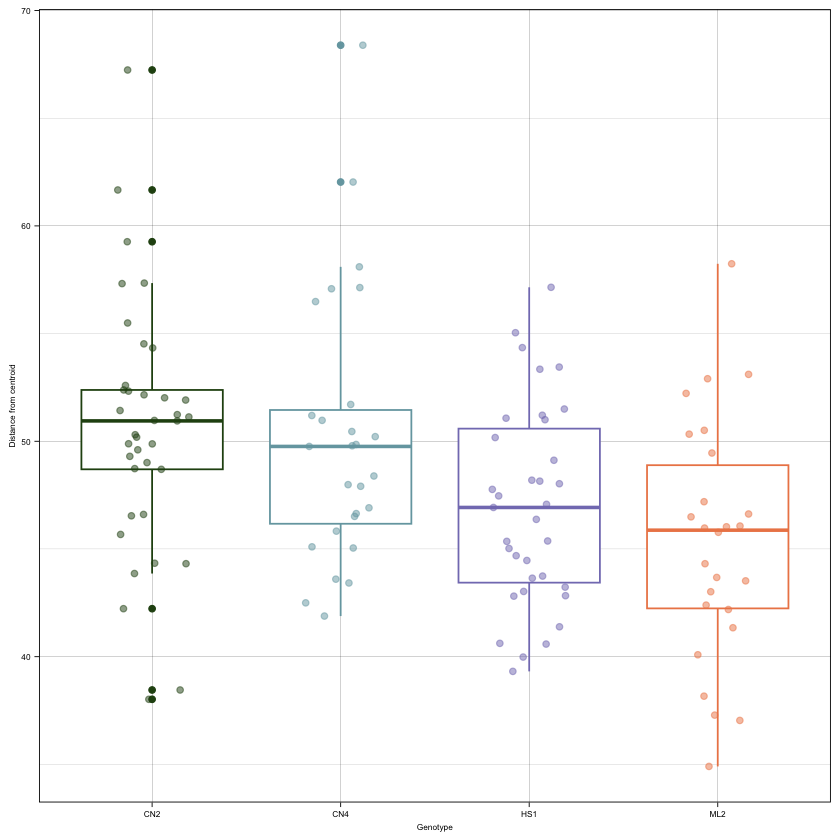

In [51]:
fig_dis = ggplot(mod_dist_df,
       aes(x=Genotype, y=mod_geno$distances)) +
geom_boxplot(aes(color=Genotype)) +
geom_jitter(aes(color=Genotype), alpha=0.5, height = 0, width = .2) +
#scale_shape_manual("Reef", values = c(3, 16, 18, 18), , labels= lab2) +
scale_color_manual(values = c("#274e13","#76a5af","#837dbe", "#ed8655" )) +
theme_linedraw() +
theme(axis.text.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size = 5)) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
#theme(axis.title.x = element_blank()) +
#theme(axis.text.x = element_blank()) +
theme(legend.position="none") +
ylab("Distance from centroid")

fig_dis

### Alpha diverity figure

In [22]:
ps_fill_alpha= filter_taxa(ps_merge, function(x) sum(x > 0) > (0.0*length(x)), TRUE)
ps_fill_alpha

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27459 taxa and 125 samples ]:
sample_data() Sample Data:        [ 125 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 27459 taxa by 7 taxonomic ranks ]:
taxa are rows

In [23]:
(ps_fill_rare <- phyloseq::rarefy_even_depth(ps_fill_alpha, rngseed = 123, replace = FALSE, sample.size=15000))             

`set.seed(123)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(123); .Random.seed` for the full vector

...

7073OTUs were removed because they are no longer 
present in any sample after random subsampling


...



phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 20386 taxa and 125 samples ]:
sample_data() Sample Data:        [ 125 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 20386 taxa by 7 taxonomic ranks ]:
taxa are rows

In [24]:
adiv <- data.frame(
  "Shannon" = phyloseq::estimate_richness(ps_fill_rare, measures = "Shannon")) %>% rownames_to_column("sample_bag")
head(adiv)

,sample_bag,Shannon
,<chr>,<dbl>
1,ML2_78_cf_Trip_3,2.144486
2,CN4_35_cf_Trip_3,4.487037
3,CN4_25_cf_Trip_3,2.806583
4,HS1_18_cf_Trip_3,2.780941
5,HS1_17_cf_Trip_3,4.011722
6,HS1_15_cf_Trip_3,3.510937


In [25]:
ps_ra_meta= as(sample_data(ps_fill_rare), "data.frame")
ps_ra_meta_envs = ps_ra_meta %>% select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
               "Speed.cm.s.", "avgSST_degC", "avgchla_mgm.3","cluster_depth")

In [28]:
adiv_trans =adiv %>%
mutate(Shannon_trans = log10(Shannon))
head(adiv_trans, n=2)

alpha_all=cbind(mod_dist_df, adiv_trans)
dim(alpha_all)
head(alpha_all, n=2)

,sample_bag,Shannon,Shannon_trans
,<chr>,<dbl>,<dbl>
1,ML2_78_cf_Trip_3,2.144486,0.3313232
2,CN4_35_cf_Trip_3,4.487037,0.6519596


[1] 125  60

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,Month,⋯,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC,mod_geno$distances,sample_bag,Shannon,Shannon_trans
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
ML2_78_cf_Trip_3,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,NA,June,⋯,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,45.77422,ML2_78_cf_Trip_3,2.144486,0.3313232
CN4_35_cf_Trip_3,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,NA,June,⋯,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,50.21582,CN4_35_cf_Trip_3,4.487037,0.6519596


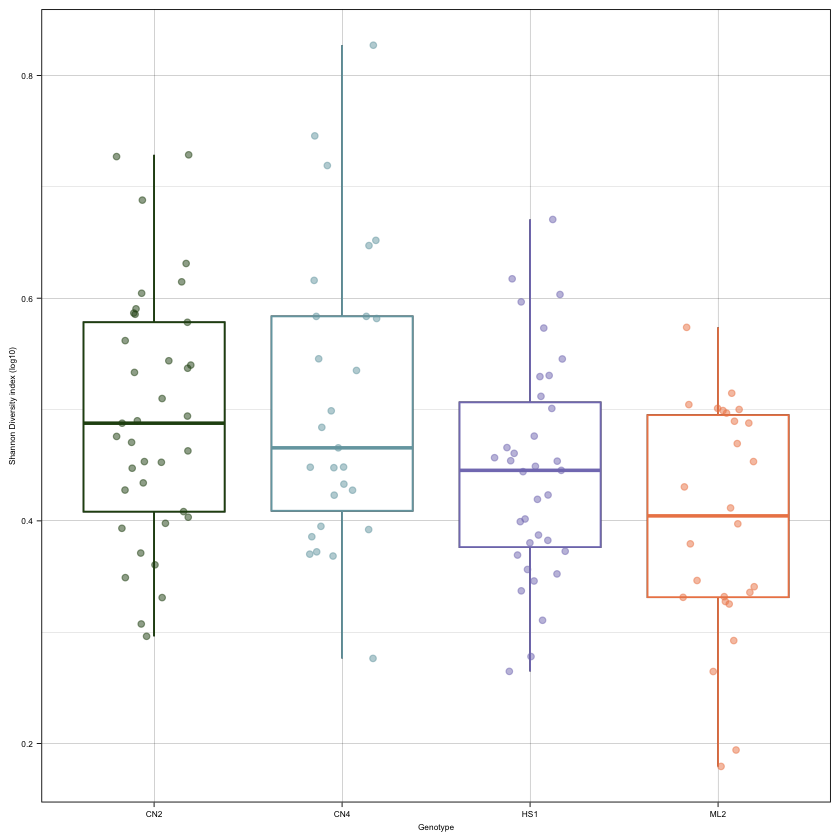

In [49]:
fig_alpha = alpha_all %>%
 ggplot(aes(x = Genotype, y = Shannon_trans))  +
  geom_boxplot(outlier.color = NA)  +
geom_boxplot(aes(color=Genotype)) +
geom_jitter(aes(color=Genotype), alpha=0.5, height = 0, width = .2) +
#scale_shape_manual("Reef", values = c(3, 16, 18, 18), labels= lab2) +
scale_color_manual(values = c("#274e13","#76a5af","#837dbe", "#ed8655" )) +
theme_linedraw() +
theme(axis.text.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size = 5)) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
#theme(axis.title.x = element_blank()) +
#theme(axis.text.x = element_blank()) +
theme(legend.position="none") +
ylab("Shannon Diversity index (log10)")
fig_alpha

### Phylogenetic tree core bacteria

treeio v1.26.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

LG Wang, TTY Lam, S Xu, Z Dai, L Zhou, T Feng, P Guo, CW Dunn, BR
Jones, T Bradley, H Zhu, Y Guan, Y Jiang, G Yu. treeio: an R package
for phylogenetic tree input and output with richly annotated and
associated data. Molecular Biology and Evolution. 2020, 37(2):599-603.
doi: 10.1093/molbev/msz240

S Xu, Z Dai, P Guo, X Fu, S Liu, L Zhou, W Tang, T Feng, M Chen, L
Zhan, T Wu, E Hu, Y Jiang, X Bo, G Yu. ggtreeExtra: Compact
visualization of richly annotated phylogenetic data. Molecular Biology
and Evolution. 2021, 38(9):4039-4042. doi: 10.1093/molbev/msab166

Shuangbin Xu, Lin Li, Xiao Luo, Meijun Chen, Wenli Tang, Li Zhan, Zehan
Dai, Tommy T. Lam, Yi Guan, Guangchuang Yu. Ggtree: A serialized data
object for visualization of a phylogenetic tree and annotation data.
iMeta 2022, 1(4):e56. doi:10.1002/imt2.56 

ggtree v3.10.0 For h

parent,node,branch.length,label
<int>,<int>,<dbl>,<chr>
33,1,0.01289045,ASV_2700
37,2,0.33541769,ASV_10973
37,3,0.11296898,ASV_11820
38,4,0.27898357,ASV_8611
38,5,0.09393845,ASV_11176
40,6,0.20102123,ASV_10183


[1] 63  4

parent,node,branch.length,label,domain,phylum,class,order,family,genus,species
<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
33,1,0.01289045,ASV_2700,Bacteria,Proteobacteria,Gammaproteobacteria,NA,NA,NA,NA
37,2,0.33541769,Alteromonadaceae,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Alteromonadaceae,Alteromonadaceae,NA
37,3,0.11296898,Cellvibrionaceae,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Cellvibrionaceae,Cellvibrionaceae,NA
38,4,0.27898357,Vibrionaceae,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrionaceae,NA
38,5,0.09393845,ASV_11176,Bacteria,Proteobacteria,Gammaproteobacteria,NA,NA,NA,NA
40,6,0.20102123,Pseudoalteromonadaceae,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Pseudoalteromonadaceae,Pseudoalteromonadaceae,NA


parent,node,branch.length,label
<int>,<int>,<dbl>,<chr>
61,32,1e-08,ASV_23


parent,node,branch.length,label
<int>,<int>,<dbl>,<chr>
58,25,0.5085334,ASV_5


parent,node,branch.length,label
<int>,<int>,<dbl>,<chr>
49,21,1e-08,ASV_6


parent,node,branch.length,label
<int>,<int>,<dbl>,<chr>
45,13,0.4182173,ASV_7


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent, branch.length, x, y
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent, branch.length, x, y
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent, branch.length, x, y
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `gro

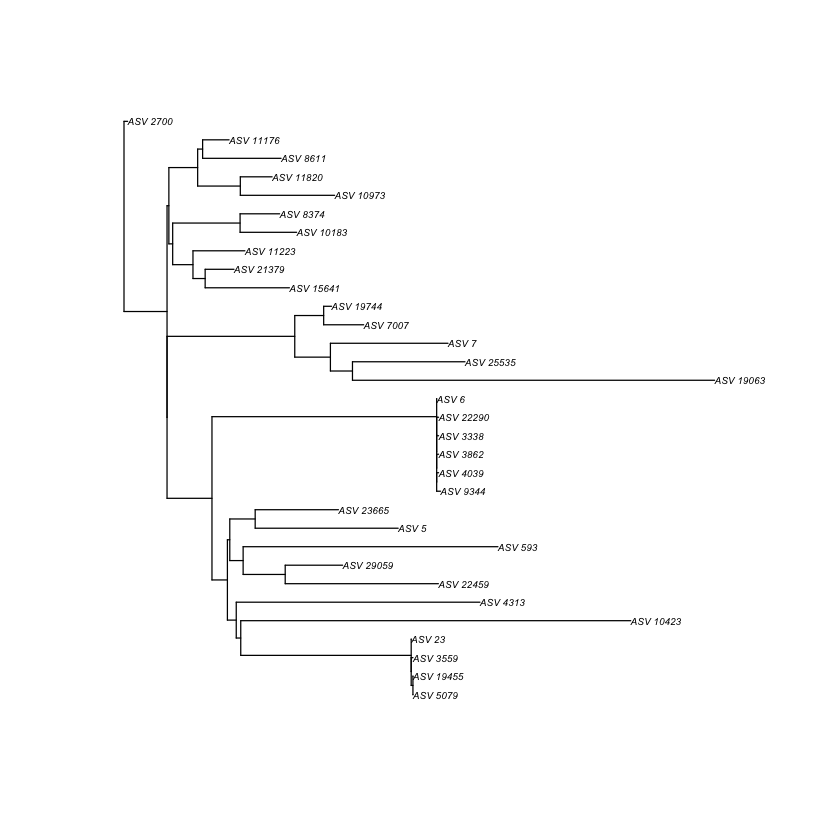

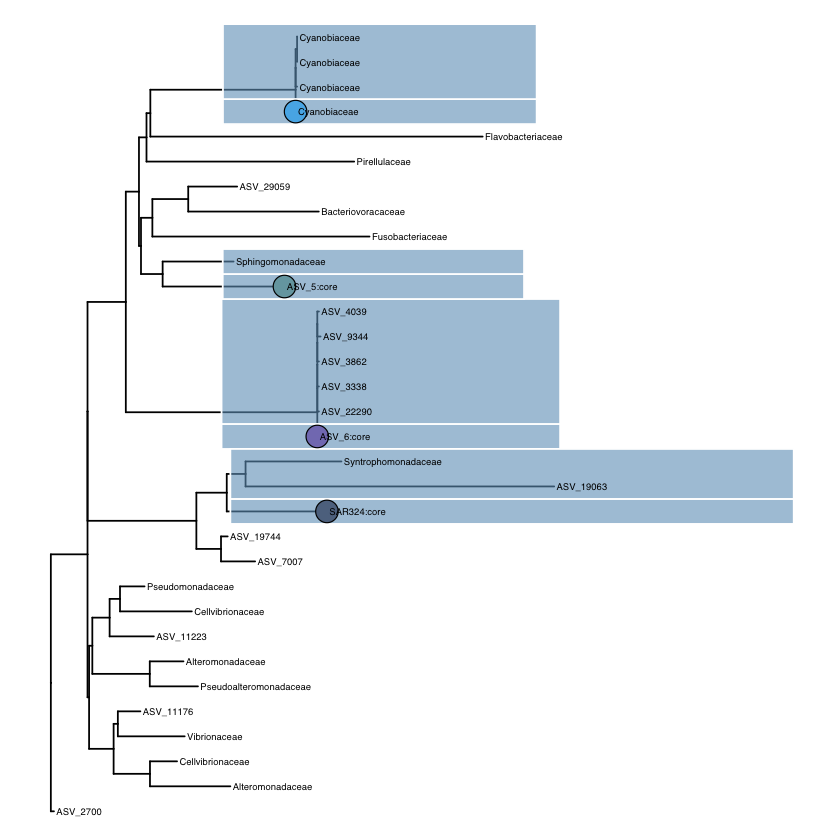

In [31]:
library(treeio)
library(ggtree)
library(ape)
library("phangorn")
library(phytools)
library(tidytree)


set.seed(10)
target <- c("ASV_5", 'ASV_6', 'ASV_7','ASV_23')

#tree <- phytools::read.newick('rosales/gtdbtk.bac12016BINS.classify.tree')
tree <- phytools::read.newick('/Users/stephanie.rosales/Desktop/POR_fitgtr_tree.nwk')
inds <- which(tree$tip.label %in% target)

ans <- NULL
depth_nodes <- 5
max_sisters <- 5
for(x in inds) {
  now <- x
  temp <- NULL
  temp1 <- NULL
  for(y in 1:depth_nodes) {
    temp <- Descendants(tree,Siblings(tree,now)[[1]])[[1]]
    temp <- temp[!temp %in% c(temp1,inds)]
    temp <- sample(temp, min(length(temp), max_sisters))
    temp1 <- c(temp,temp1)
    now <- Ancestors(tree,now,'parent')
  }
  ans <- unique(c(ans,temp1))
}

newtree <- keep.tip(tree,c(ans,inds))
plot(ladderize(newtree),cex=0.5)


#make tree into tibble
x <- as_tibble(newtree) #%>%
 #rownames_to_column %>%
#column_to_rownames("rowname")  %>%
 #mutate(across('label', str_replace, "ASV_5$", "ASV_5:core")) %>%
  # mutate(across('label', str_replace, "ASV_6$", "ASV_6:core")) %>%
   #mutate(across('label', str_replace, "ASV_7$", "SAR324:core")) %>%
#mutate(across('label', str_replace, "ASV_23$", "Cyanobiaceae:core")) 
#rename (ASVs=label)
head(x)
dim(x)

taxa_for_tree = taxo_mat %>% 
as.data.frame() %>%
rownames_to_column("label") 

y = x %>% left_join(taxa_for_tree, "label") %>% mutate(label = coalesce(family, label)) #%>%
#mutate(across('label', str_replace, "ASV_5$", "ASV_5:core")) %>%
 # mutate(across('label', str_replace, "ASV_6$", "ASV_6:core")) #%>%
   #mutate(across('label', str_replace, "ASV_7$", "SAR324:core")) #%>%
#mutate(if_else('label', str_replace, "ASV_23", "Cyanobiaceae:core"))

head(y)


target <- c("ASV_5:core", 'ASV_6:core', 'SAR324:core','ASV_23')

x %>%
as_tibble() %>%
filter(label == 'ASV_23') 

x %>%
as_tibble() %>%
filter(label == "ASV_5") 

x %>%
as_tibble() %>%
filter(label == "ASV_6") 

x %>%
as_tibble() %>%
filter(label == "ASV_7") 

#"ASV_6:core", "SAR324:core", "Cyanobiaceae:core"))


d <- data.frame(nodes=c(49, 25, 21, 13), type=c("A", "B", "C", "D"))
fig_tree=y %>% 
as.phylo %>%
ggtree() +
geom_balance(node=49, fill='#6D9EC1', color='white', alpha=0.6, extend=1) +
geom_balance(node=45, fill='#6D9EC1', color='white', alpha=0.6, extend=1) +
geom_balance(node=58, fill='#6D9EC1', color='white', alpha=0.6, extend=1) +
geom_balance(node=61, fill='#6D9EC1', color='white', alpha=0.6, extend=1) +
geom_point2(aes(subset=(node==32)), shape=21, size=6, fill='#56B4E9') +
geom_point2(aes(subset=(node==25)), shape=21, size=6, fill='#76a5af') +
geom_point2(aes(subset=(node==21)), shape=21, size=6, fill='#837dbe') +
geom_point2(aes(subset=(node==13)), shape=21, size=6, fill="#5E738F") +

#geom_tiplab(size=1.9) +
geom_tiplab(size=2) 
fig_tree

Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent, branch.length, x, y
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent, branch.length, x, y
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent, branch.length, x, y
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were d

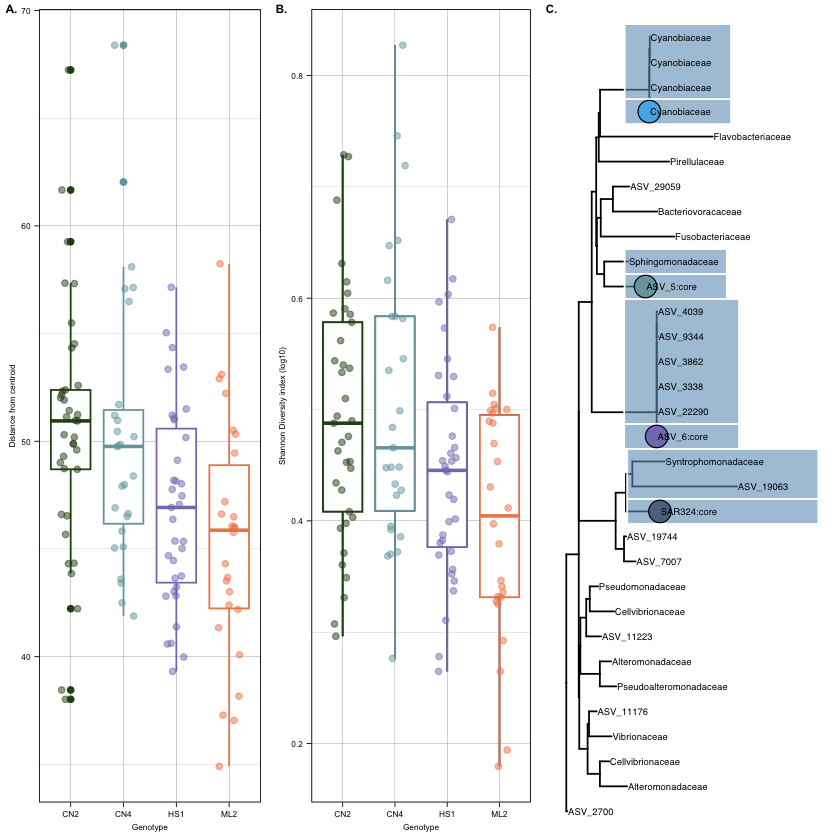

In [53]:
comboABC= ggpubr::ggarrange(fig_dis, fig_alpha,
                  common.legend = FALSE, nrow=1,
                labels = c("A.", "B."), font.label = list(size = 7))

ggpubr::ggarrange(comboABC, fig_tree,
                  common.legend = FALSE, nrow=1, widths = c(1.8, 1), heights=c(1,.7),
                labels = c("", "C."), font.label = list(size = 7))

ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/Fig3.png", 
      width = 6, height = 4, units = "in", dpi=300)

### Random Forest for location and months

Warning message in psmelt(.):
“The sample variables: 
order, species
 have been renamed to: 
sample_order, sample_species
to avoid conflicts with taxonomic rank names.”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `OTU == taxa_trip`.
Caused by warning in `OTU == taxa_trip`:
! longer object length is not a multiple of shorter object length”


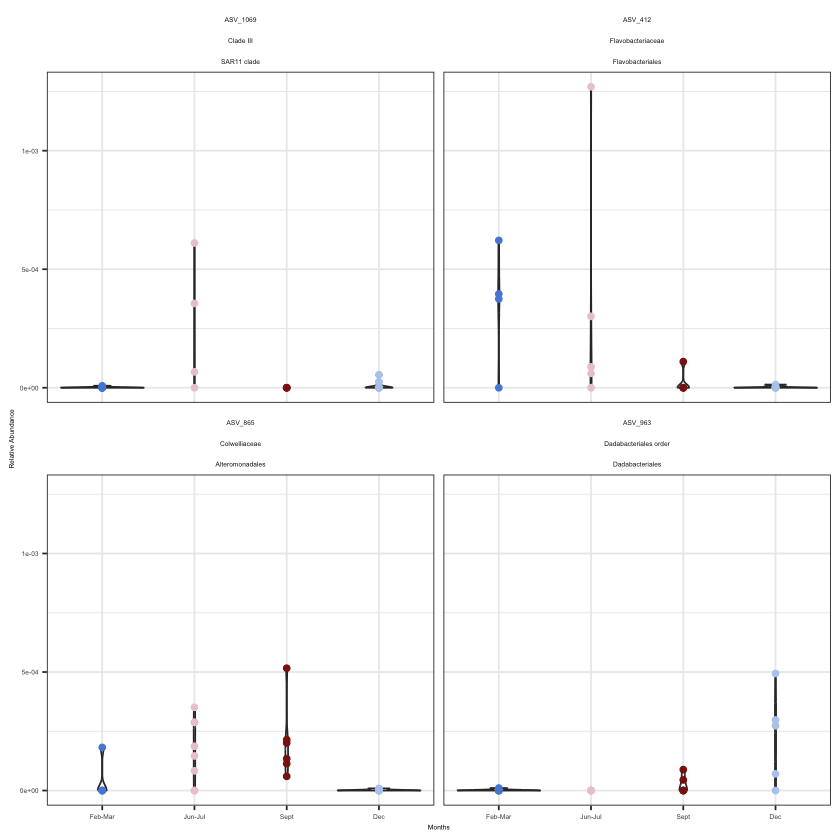

In [58]:
taxa_trip= c("ASV_865",
"ASV_963",
"ASV_151",
"ASV_412",
"ASV_1299",
"ASV_1069"
)


sum_ps   <- ps_fill %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

fig_rf_month= sum_ps %>%
#filter(Abundance >0) %>%
filter(OTU== taxa_trip)%>%

ggplot(
           aes(x=Samp_trip, y = Abundance)) + 
# geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
 
geom_violin() +
geom_point(aes( color=Samp_trip)) +

  theme_bw() +

scale_x_discrete( name = "Months", labels=c("Trip_2" = "Feb-Mar", "Trip_3" = "Jun-Jul",
                              "Trip_4" = "Sept", "Trip_5"= "Dec")) +
facet_wrap(.~OTU*genus*order) +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(size=4 )) +
#theme(strip.text.y = element_blank()) +
#theme(strip.text.x = element_blank()) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) +
theme(strip.text.x = element_text(size=4)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(keywidth = 0.1, , keyheight =.10)) +
theme(legend.title= element_text(size=6)) +
theme(axis.title.x = element_text(size = 4)) +
theme(axis.title.y = element_text(size = 4)) +
ylab("Relative Abundance") +
guides(color="none") +
 scale_color_manual("Months", values=c("#558bd9", "#EBCBD3", "#8c1c13", "#b6cdee"),  labels= lab1) 

fig_rf_month

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `OTU == taxa_reef`.
Caused by warning in `OTU == taxa_reef`:
! longer object length is not a multiple of shorter object length”


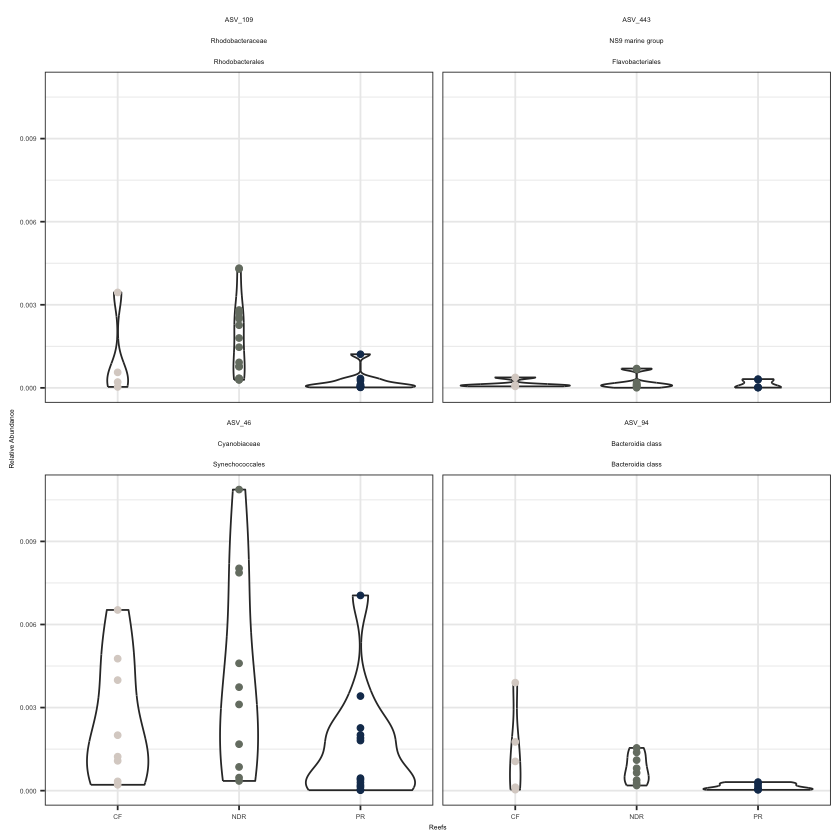

In [59]:
taxa_reef=c( "ASV_109",
"ASV_94",
"ASV_443",
"ASV_46",
"ASV_2548")

fig_rf_reef = sum_ps %>%
filter(Abundance >0) %>%
filter(OTU== taxa_reef)%>%

ggplot(
           aes(x=reef, y = Abundance)) + 
# geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
 
geom_violin() +
geom_point(aes( color=reef)) +

  theme_bw() +

facet_wrap(OTU*genus*order~.) +
scale_color_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
scale_x_discrete( name = "Reefs", labels=c("cf" = "CF", "ndr" = "NDR",
                              "pr" = "PR")) +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(size=4 )) +
#theme(strip.text.y = element_blank()) +
#theme(strip.text.x = element_blank()) +

theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) +
theme(strip.text.x = element_text(size=4)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(axis.title.x = element_text(size = 4)) +
theme(axis.title.y = element_text(size = 4)) +
ylab("Relative Abundance") +
guides(color="none")
fig_rf_reef

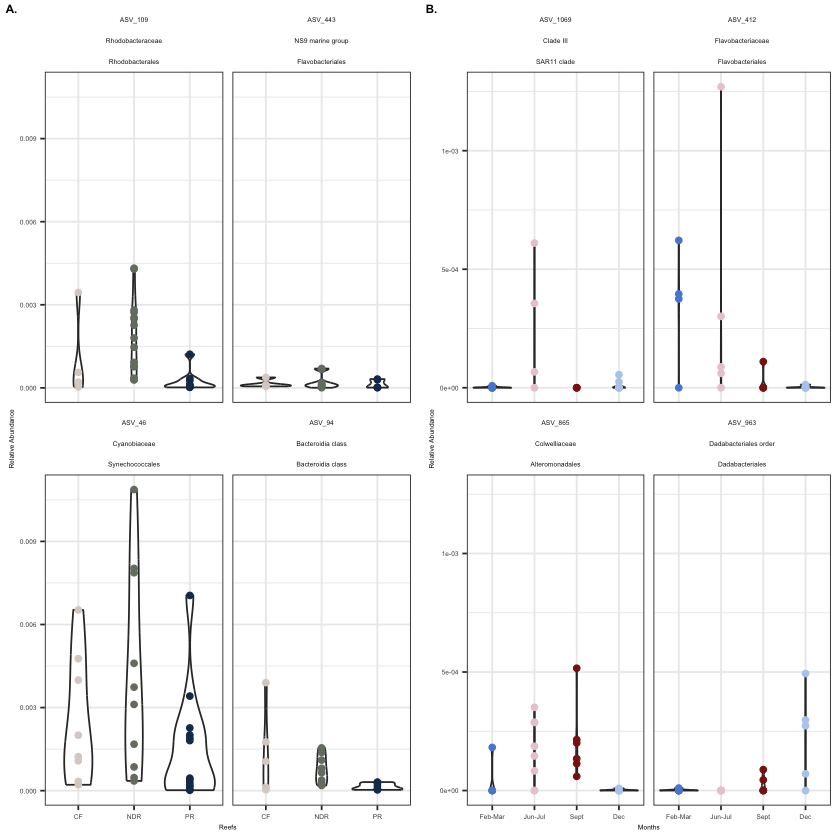

In [66]:
ggpubr::ggarrange(fig_rf_reef, fig_rf_month,
                  common.legend = TRUE, ncol=2,
                labels = c("A.", "B."), font.label = list(size = 7))
ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/Fig4.png", 
      width = 5, height = 4, units = "in", dpi=300)

In [61]:
head(ps_ra_meta_envs)
y_columns <- names(ps_ra_meta_envs[3:12])
y_columns

,Genotype,Samp_trip,reef,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,avgchla_mgm.3,cluster_depth
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,ML2,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-20.9
CN4_35_cf_Trip_3,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-17.9
CN4_25_cf_Trip_3,CN4,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-20.8
HS1_18_cf_Trip_3,HS1,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-18.8
HS1_17_cf_Trip_3,HS1,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-17.8
HS1_15_cf_Trip_3,HS1,Trip_3,cf,4.852118,0.032,0.893,0.861,0.0685,0.706,29.63623,1.792092,-17.6


[1] "reef"          "Speed.cm.s."   "NO2.uM."       "N.N.uM."      
 [5] "NO3.uM."       "PO4.uM."       "Si.uM."        "avgSST_degC"  
 [9] "avgchla_mgm.3" "cluster_depth"

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


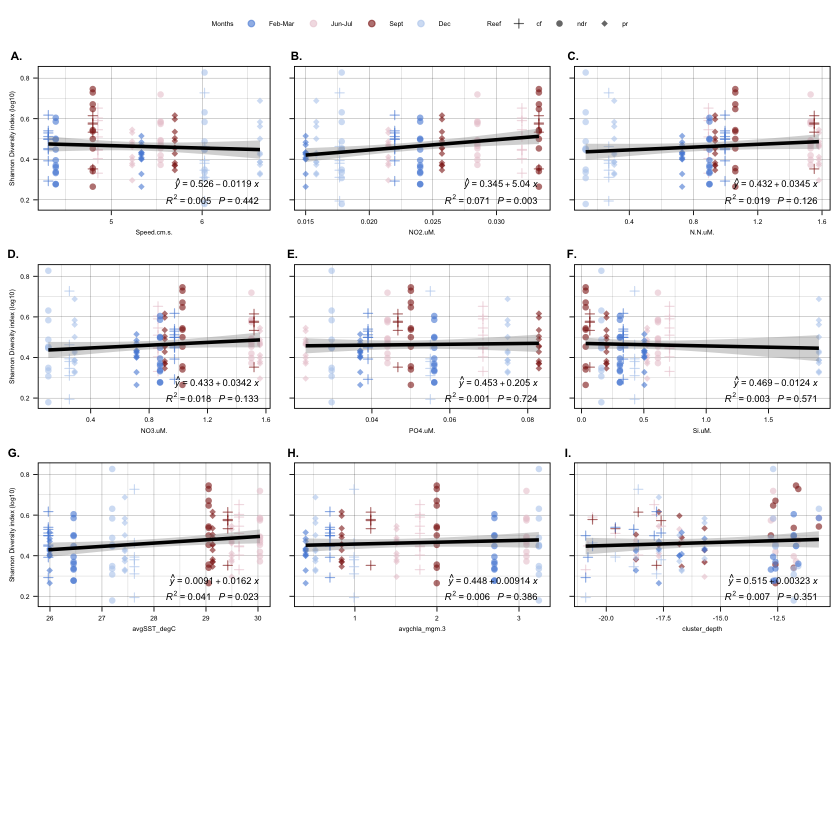

In [63]:
library(ggpubr)


# Create an empty list to store the plots
plots <- list()

# Create a shared plot with geom_smooth and geom_point
shared_plot <- alpha_all %>%
  ggplot(aes(x = .data[[y_columns[1]]], y = Shannon_trans, color = Samp_trip), size=0.5) +
  geom_point(aes(color = Samp_trip, shape = reef), alpha = .6) +
  theme_bw() +
  geom_smooth(method = 'lm', color = 'black') +
  stat_poly_eq(
    formula = y ~ x,
    eq.with.lhs = "italic(hat(y))~`=`~",
    aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
    parse = TRUE,
    label.y = "bottom",
    label.x = "right",
    color = "black",
    rr.digits = 3,
    size = 2
  ) +
  stat_poly_eq(
    aes(label = paste(..eq.label.., sep = "~~~")),
    label.y = 0.15,
    eq.with.lhs = "italic(hat(y))~`=`~",
    eq.x.rhs = "~italic(x)",
    formula = y ~ x,
    parse = TRUE,
    size = 2,
    label.x = "right",
    color = "black"
  ) +
  scale_shape_manual("Reef", values = c(3, 16, 18, 18)) +
 scale_color_manual("Months", values=c("#558bd9", "#EBCBD3", "#8c1c13", "#b6cdee"),  labels= lab1) +
  theme_linedraw() +
  theme(legend.text = element_text(size = 4)) +
  theme(legend.title = element_text(size = 4)) +
  theme(axis.title.x = element_text(size = 4)) +
  theme(axis.text.x = element_text(size = 4)) +
  theme(axis.text.y = element_text(size = 4)) +
  theme(axis.title.y = element_text(size = 4))

# Loop through each y variable (starting from the second one) and create a plot
for (i in 1:length(y_columns[-1])) {
  y_var <- y_columns[-1][i]
  
  plot <- shared_plot +
    aes(x = .data[[y_var]]) +  # Modify the x-axis variable
    theme(plot.margin = margin(0.4, 0.2, 0.2, 0.2, "cm"))  # Reduce plot margin to avoid clipping
  
  # Remove legend for individual plots
  plot <- plot + theme(legend.position = "none") 
  
  # Remove y-axis title for specified figures
  if (i %in% c(2, 3, 5, 6, 8, 9)) {
    plot <- plot + theme(axis.title.y = element_blank()) + theme(axis.text.y = element_blank()) 
  }
  
  # Add the plot to the list
  plots[[y_var]] <- plot
  
  # Modify ylab for figures "A" and "E"
  if (i %in% c(1, 4, 7)) {
    plots[[y_var]] <- plots[[y_var]] + ylab("Shannon Diversity index (log10)") + theme(axis.text.x = element_text(size = 4)) 
  }
}

# Arrange plots using ggarange
combined_plot <- ggpubr::ggarrange(plotlist = plots, ncol = 3, nrow = 4, common.legend = TRUE,
                labels = c(" A.", " B.", "C. ", "D. ", "E. ", "F. ", "G. ", "H. ", "I. "), font.label = list(size = 7),
               legend="top")

# Print the combined plot
print(combined_plot)


ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/Fig5.tiff", 
      width = 4, height = 5.5, units = "in", dpi=300)

In [73]:
?ord_plot

ord_plot {microViz},R Documentation
data,"psExtra object with ordination attached, i.e. output from ord_calc"
axes,"which axes to plot: numerical vector of length 2, e.g. 1:2 or c(3,5)"
plot_taxa,"if ord_calc method was ""PCA/RDA"" draw the taxa loading vectors (see details)"
tax_vec_length,"taxon arrow vector scale multiplier. NA = auto-scaling, or provide a numeric multiplier yourself."
tax_vec_style_all,list of named aesthetic attributes for all (background) taxon vectors
tax_vec_style_sel,list of named aesthetic attributes for taxon vectors for the taxa selected by plot_taxa
tax_lab_length,scale multiplier for label distance/position for any selected taxa
tax_lab_style,"list of style options for the taxon labels, see tax_lab_style() function."
taxon_renamer,function that takes any plotted taxon names and returns modified names for labels
constraint_vec_length,"constraint arrow vector scale multiplier. NA = auto-scaling, or provide a numeric multiplier yourself."


In [75]:
ord_RDA= ps_fill %>%
tax_fix() %>%
  tax_transform("clr", rank = "order") %>%
  ord_calc(
    constraints = c("NO2.uM.",
                               "avgSST_degC",  "N.N.uM.", "PO4.uM.", "Speed.cm.s.", "Si.uM.",
                   "cluster_depth"),
    # method = "RDA", # Note: you can specify RDA explicitly, and it is good practice to do so, but microViz can guess automatically that you want an RDA here (helpful if you don't remember the name?)
    scale_cc = FALSE)  %>%  # doesn't make a difference %>%
  
ord_plot(
    colour = "Samp_trip", size = 2, alpha = 0.9, shape = "reef",
    plot_taxa = 1:5, auto_caption = NA,  
     constraint_vec_style = vec_constraint(1, colour = "grey15"),
    constraint_lab_style = constraint_lab_style(
      max_angle = 90, size = 1, aspect_ratio = 1.5, colour = "black", var_renamer=c("NO2uM", "Temperature", "N2uM", "PO4.uM", 
                                                                                  "Speed.cm.s", "Si.uM", "Depth"),
    
  )) +
scale_color_manual("Months", values=c("#558bd9", "#EBCBD3", "#8c1c13", "#b6cdee"),  labels= lab1) +
scale_shape_manual("Reef", values=c(3, 16, 18, 18),  labels= lab2) +
theme(legend.title= element_text(size=3),
      legend.margin = margin(0, 0, 0, 0),
      legend.spacing.x = unit(0, "mm"),
      legend.spacing.y = unit(0, "mm"),
     legend.position="top", legend.box = "vertical") +
theme(legend.text =element_text(size=3.7)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5))
ord_RDA

ERROR: Error in ord_plot(., colour = "Samp_trip", size = 2, alpha = 0.9, shape = "reef", : argument 8 matches multiple formal arguments


In [70]:
GoodTaxa = c(
"ASV_531",
"ASV_412",
"ASV_865",
"ASV_639",
"ASV_94",
"ASV_251",
"ASV_636",
"ASV_5",
"ASV_1042",
"ASV_94",
"ASV_251",
"ASV_200",
"ASV_172",
"ASV_109",
"ASV_305",
"ASV_46",
"ASV_68",
"ASV_535",
"ASV_198")

allTaxa = taxa_names(ps_fill)
allTaxa <- allTaxa[(allTaxa %in% GoodTaxa)]
ps_fill_tax = prune_taxa(allTaxa, ps_fill)
ps_fill_tax

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 16 taxa and 125 samples ]:
sample_data() Sample Data:        [ 125 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 16 taxa by 7 taxonomic ranks ]:
taxa are rows

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust vegan



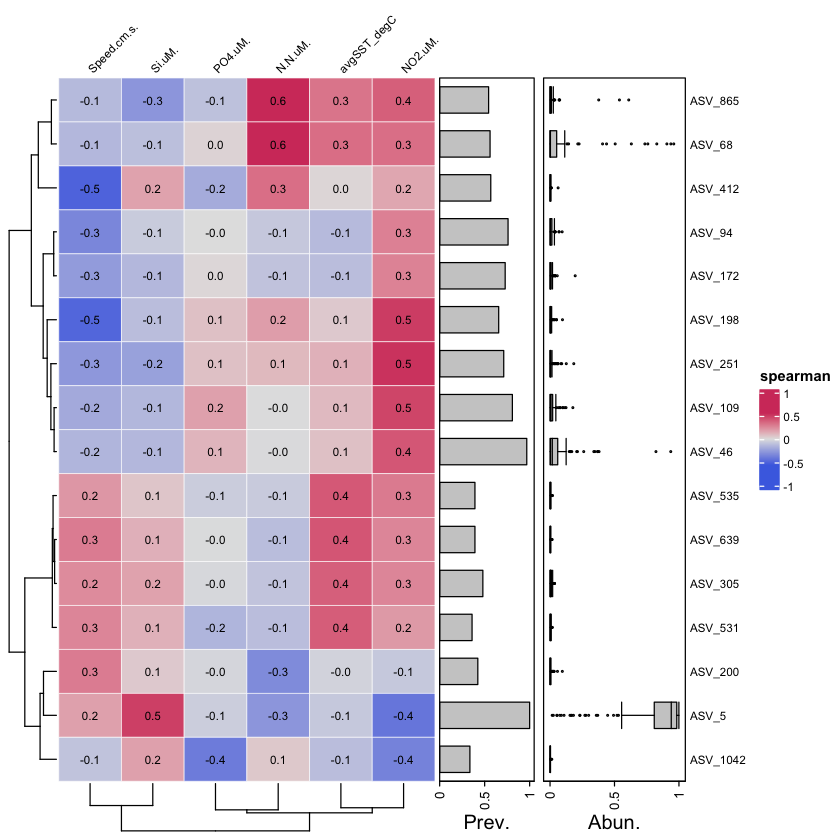

In [71]:

fig_rf=cor_heatmap(
  data = ps_fill_tax,  cor = "spearman", vars = c("NO2.uM.",
                               "avgSST_degC",  "N.N.uM.", "PO4.uM.", "Speed.cm.s.", "Si.uM."))
  #tax_anno = taxAnnotation(
    #Prv. = anno_tax_prev(undetected = ud),
   # Abd. = anno_tax_box(undetected = ud)



gg_rf= as.ggplot(fig_rf)

gg_rf

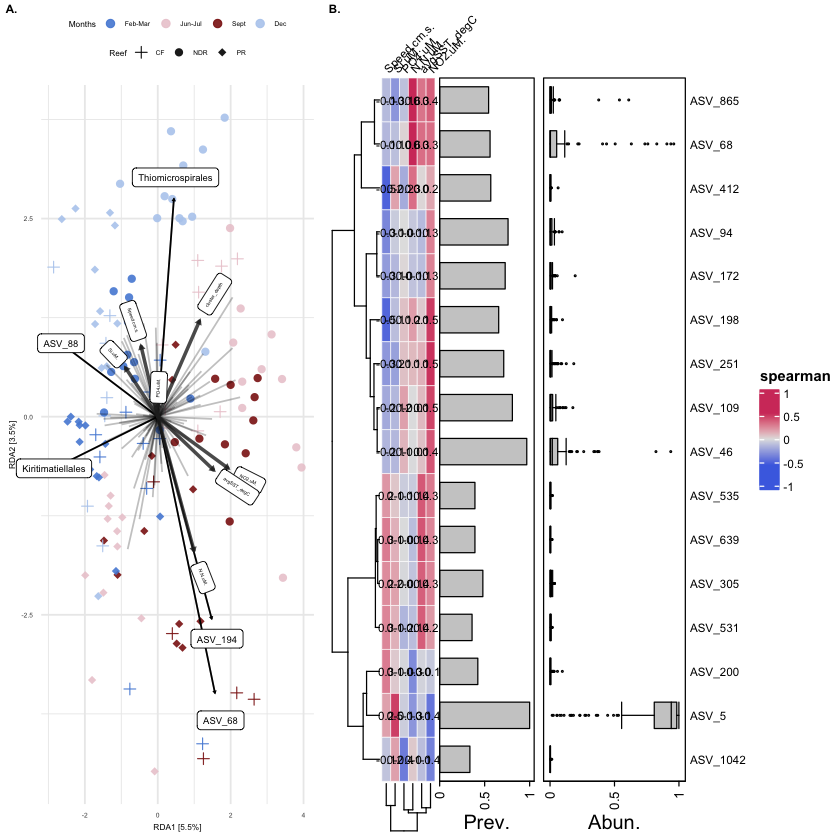

In [72]:
ggpubr::ggarrange(ord_RDA, gg_rf,
                  common.legend = FALSE, nrow=1,
                labels = c("A.", "B."), font.label = list(size = 7),
                widths = c(1, 1.6), heights=c(1,1))

ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/Fig6.tiff", 
     width = 8, height = 5, units = "in", dpi=300)

## Supplemental

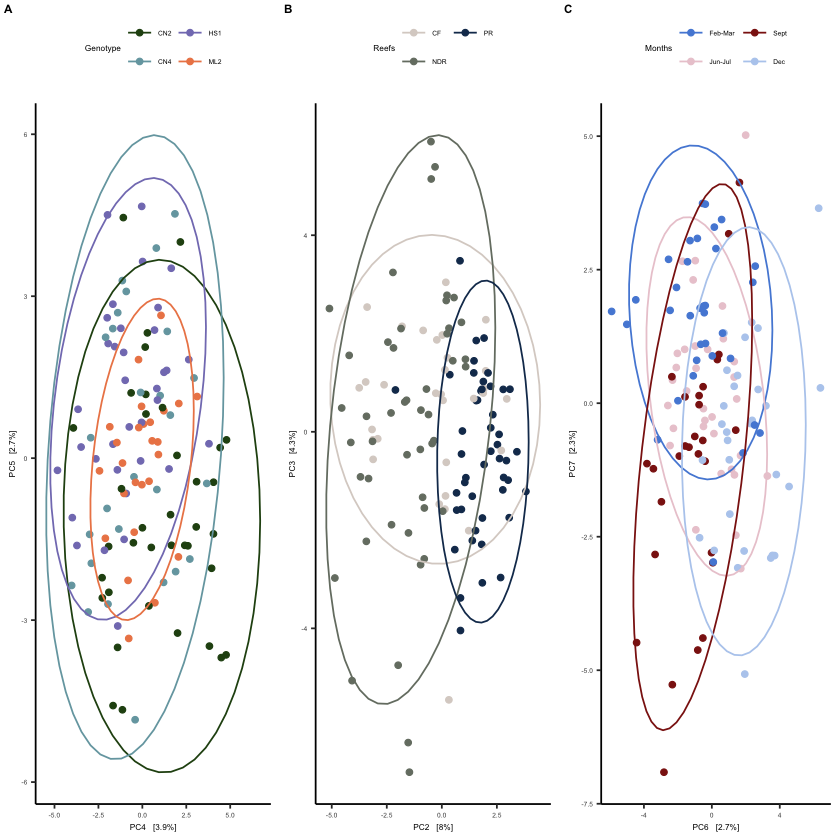

In [76]:
# transform data into relative abundance and ordinate
ps_clr <- microbiome::transform(ps_fill, 'clr')
psr_clr_ord <- ordinate(ps_clr, "RDA", "euclidean")

lab1=c("Feb-Mar", "Jun-Jul", "Sept", "Dec")
lab2=c("CF", "NDR", "PR")

fig_ord_geno = plot_ordination(ps_clr, psr_clr_ord,
                               color="Genotype",
                             # shape="reef",
                            axes = c(4,5)) +
#geom_point(size = .01) +
scale_color_manual(values = c("#274e13","#76a5af","#837dbe", "#ed8655" )) +
theme_classic() +
theme(legend.text =element_text(size=4), legend.position="top", legend.box = "vertical") +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(nrow = 2))+
stat_ellipse()


fig_ord_month=plot_ordination(ps_clr, psr_clr_ord,
                               color="Samp_trip",
                             # shape="reef",
                            axes = c(6,7)) +
#geom_point(size = .01) +
scale_color_manual("Months", values=c("#558bd9", "#EBCBD3", "#8c1c13", "#b6cdee"),  labels= lab1) +
theme_classic() +
theme(legend.text =element_text(size=4), legend.position="top") +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(nrow = 2))+
stat_ellipse()



fig_ord_reef=plot_ordination(ps_clr, psr_clr_ord,
                               color="reef",
                             # shape="reef",
                            axes = c(2,3)) +
#geom_point(size = .01) +
scale_color_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
theme_classic() +
theme(legend.text =element_text(size=4), legend.position="top") +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(nrow = 2))+
stat_ellipse()

ggpubr::ggarrange(fig_ord_geno, fig_ord_reef, fig_ord_month,
                  common.legend = FALSE, nrow=1, ncol=3,
                labels = c("A", "B", "C"), font.label = list(size = 7))

ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/suppl_fig3.png", 
      width = 6.5, height = 4, units = "in", dpi=300)

#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/ord_bray.png", width = 4, height = 4, units = "in", dpi=300)     

Warning message in psmelt(.):
“The sample variables: 
order, species
 have been renamed to: 
sample_order, sample_species
to avoid conflicts with taxonomic rank names.”


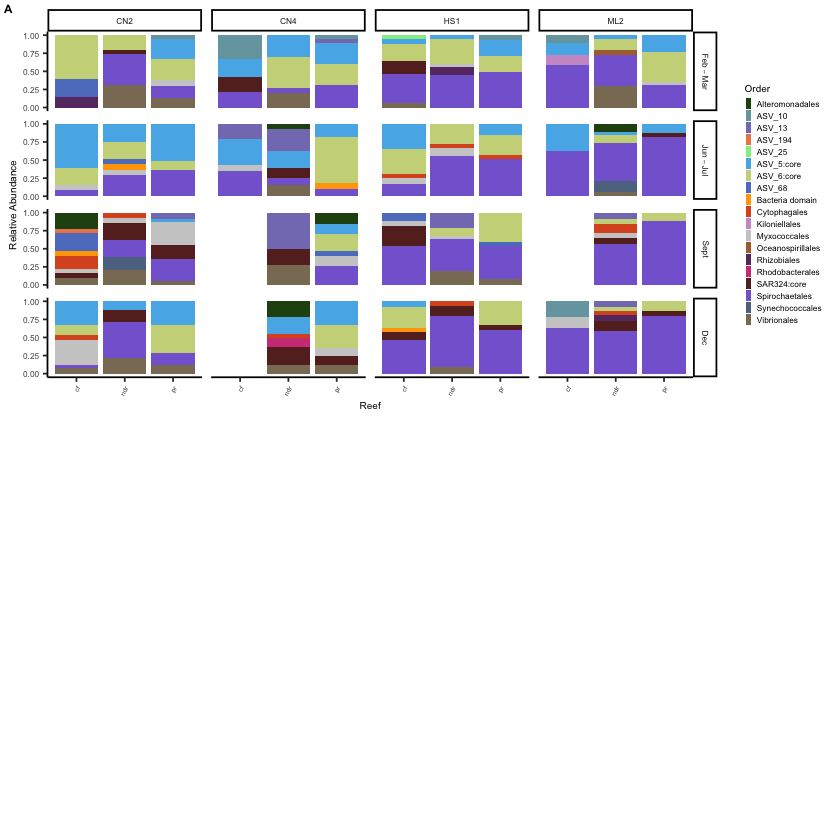

In [77]:
sum_ps   <- ps_fill %>%
  tax_glom(taxrank = "order") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()
supp.labs <- as_labeller(c(Trip_2="Feb-Mar", Trip_3="Jun-Jul", Trip_4="Sept", Trip_5="Dec"),
                           default = label_parsed)
fig_ra= sum_ps %>%
filter(Abundance>=0.1) %>%
ggplot(aes(x =reef, y=Abundance, fill=order)) + 
       
geom_bar(stat="identity", position="fill", aes(fill = order)) + 
#facet_grid(Samp_trip~Genotype, scales = "free") +
facet_grid(Samp_trip~Genotype, space="free", labeller = labeller(Samp_trip= supp.labs)) +
scale_fill_manual("Order",values=c("#274e13","#76a5af","#837dbe", "#ed8655", "lightgreen",
                           "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 60, hjust = 1, size=8)) +
ylab("Relative Abundance") +
xlab("Reef") +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =5)) +
theme(strip.text.x = element_text(size =5)) +
theme(strip.text.y = element_text(size =5)) 




ggpubr::ggarrange(fig_ra,
                  common.legend = FALSE, nrow=2,
                labels = c("A"), font.label = list(size = 7))

ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/suppl_fig4.png", 
      width = 5, height = 5, units = "in", dpi=300)

,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,cluster_depth,avgchla_mgm.3
Speed.cm.s.,1.0,-0.5,-0.5,-0.5,0.2,0.6,0.1,0.0,-0.1
NO2.uM.,-0.5,1.0,0.6,0.6,0.2,-0.4,0.7,0.2,0.3
N.N.uM.,-0.5,0.6,1.0,1.0,-0.2,-0.3,0.6,0.0,0.1
NO3.uM.,-0.5,0.6,1.0,1.0,-0.2,-0.3,0.6,0.0,0.1
PO4.uM.,0.2,0.2,-0.2,-0.2,1.0,0.4,0.1,-0.2,-0.3
Si.uM.,0.6,-0.4,-0.3,-0.3,0.4,1.0,-0.1,-0.3,-0.4


,Speed.cm.s.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,avgSST_degC,cluster_depth,avgchla_mgm.3
Speed.cm.s.,0.000000e+00,3.742661e-27,2.026530e-27,3.830614e-27,1.758682e-05,1.899854e-33,1.201515e-01,8.067153e-01,2.732239e-02
NO2.uM.,3.742661e-27,0.000000e+00,3.651051e-37,5.518612e-36,1.032196e-04,8.073802e-16,3.133374e-50,1.499600e-03,8.509235e-11
N.N.uM.,2.026530e-27,3.651051e-37,0.000000e+00,0.000000e+00,3.004497e-06,2.869573e-07,4.064679e-36,7.955656e-01,8.540992e-02
NO3.uM.,3.830614e-27,5.518612e-36,0.000000e+00,0.000000e+00,1.868407e-06,4.056235e-07,1.693510e-35,7.669027e-01,9.840424e-02
PO4.uM.,1.758682e-05,1.032196e-04,3.004497e-06,1.868407e-06,0.000000e+00,6.321373e-14,1.822751e-02,3.091993e-04,1.302627e-09
Si.uM.,1.899854e-33,8.073802e-16,2.869573e-07,4.056235e-07,6.321373e-14,0.000000e+00,3.051057e-01,2.912381e-07,1.071571e-12


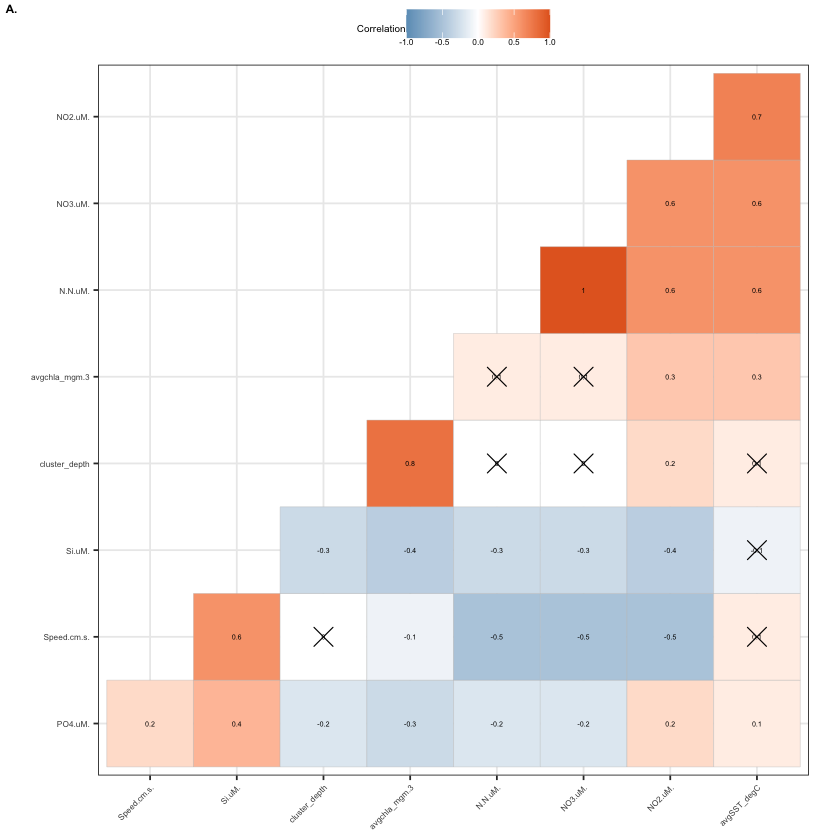

In [78]:
meta_envs= meta %>%
filter(cluster_depth!= "NA") %>%
select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.',
                "Speed.cm.s.", "avgSST_degC", "cluster_depth","avgchla_mgm.3") #%>%
#rename('Speed.cm.s.' = "Current") %>%
#rename('NO2.uM.' = "NO2μM") %>%
#rename('N.N.uM.' = "N2μM")  %>%
#rename('NO3.uM.' = "NO3μM") %>%
#rename('PO4.uM.' = "PO4μM") %>%
#rename('Si.uM.' = "SiμM") %>%
#rename('avgSST_degC' = "Temp") %>%
#rename('cluster_depth' = "Depth") %>%
#rename('avgchla_mgm.3' = "Chla")


corr <- round(cor(meta_envs[4:12]),1)
head(corr)


# Compute a matrix of correlation p-values
p.mat <- cor_pmat(meta_envs[4:12])
head(p.mat[, 1:9])

fig_cor = ggcorrplot(corr, 
            hc.order = TRUE,
    type = "lower", p.mat = p.mat,  lab = TRUE,
          legend.title = "Correlation",
          colors = c("#6D9EC1", "white", "#E46726"),
           lab_size = 1.5,
                    ggtheme = ggplot2::theme_bw
                    ) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
guides(color = guide_legend(keywidth = 0.1, , keyheight =.10)) +
theme(legend.title= element_text(size=6),
      legend.margin = margin(0.1, 0, 0, 0),
      legend.spacing.x = unit(0.1, "mm"),
      legend.spacing.y = unit(0.1, "mm"),
     legend.position="top", legend.box = "vertical") 

fig_cor2=as.ggplot(fig_cor)

ggpubr::ggarrange(fig_cor2,
                  common.legend = FALSE, nrow=1,
                labels = c("A."), font.label = list(size = 7),
                widths = c(1, 1.5), align="h", legend="top", heights=c(1.2,1))

ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/suppl_fig5.tiff", 
      width = 4, height = 4, units = "in", dpi=300)

Warning message in psmelt(.):
“The sample variables: 
order, species
 have been renamed to: 
sample_order, sample_species
to avoid conflicts with taxonomic rank names.”


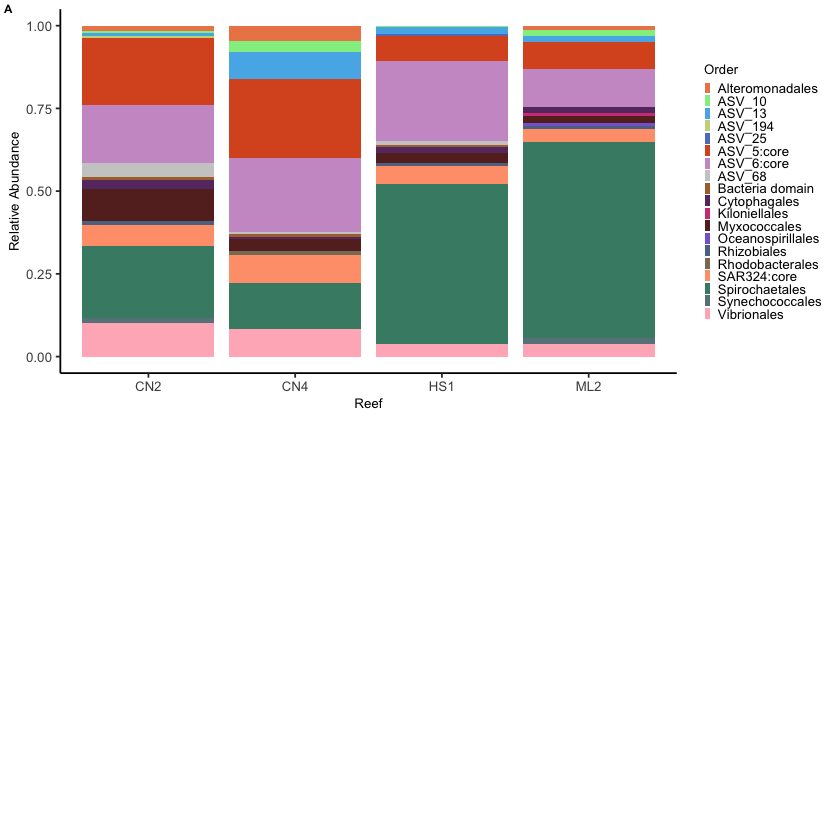

In [16]:
sum_ps   <- ps_fill %>%
  tax_glom(taxrank = "order") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()
supp.labs <- as_labeller(c(Trip_2="Feb-Mar", Trip_3="Jun-Jul", Trip_4="Sept", Trip_5="Dec"),
                           default = label_parsed)
fig_ra= sum_ps %>%
filter(Abundance>=0.1) %>%
ggplot(aes(x =Genotype, y=Abundance, fill=order)) + 
       
geom_bar(stat="identity", position="fill", aes(fill = order)) + 
#facet_grid(Samp_trip~Genotype, scales = "free") +
#facet_grid(Samp_trip~Genotype, space="free", labeller = labeller(Samp_trip= supp.labs)) +
scale_fill_manual("Order",values=c( "#ed8655", "lightgreen",
                           "#56B4E9","#CBD588","#5F7FC7","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +


ylab("Relative Abundance") +
xlab("Reef") +
theme(legend.text =element_text(size=8)) +
theme(legend.title = element_text(size=8)) +
theme(axis.title.x = element_text(size = 8)) +
theme(axis.title.y = element_text(size = 8)) +
theme(axis.text.x = element_text(size =8)) +
theme(axis.text.y = element_text(size =8)) +
theme(strip.text.x = element_text(size =8)) +
theme(strip.text.y = element_text(size =8)) 




ggpubr::ggarrange(fig_ra,
                  common.legend = FALSE, nrow=2,
                labels = c("A"), font.label = list(size = 7))

ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/forPresentation.png", 
      width = 5, height = 5, units = "in", dpi=300)